# 第三题

       id   carid  startday starttime  startweidu  startjingdu    endday  \
0       4  459074  1/5/2018   6:09:49   39.970322   116.351395  1/5/2018   
1       3  420604  1/5/2018   6:07:14   39.756088   116.312943  1/5/2018   
2       5  165558  1/5/2018   6:17:56   39.953842   116.436539  1/5/2018   
3      29  258590  1/5/2018   8:09:42   39.850845   116.488724  1/5/2018   
4      28  373864  1/5/2018   8:08:09   39.986801   116.442032  1/5/2018   
...   ...     ...       ...       ...         ...          ...       ...   
7543  759  299501  3/5/2018  13:57:37   39.955215   116.358261  3/5/2018   
7544  757  375130  3/5/2018  13:48:34   39.787674   116.326675  3/5/2018   
7545  756   29137  3/5/2018  13:47:58   39.776688   116.514816  3/5/2018   
7546  755  119594  3/5/2018  13:46:46   39.930496   116.236038  3/5/2018   
7547  758  373632  3/5/2018  13:49:44   39.925003   116.509323  3/5/2018   

       endtime   endweidu   endjingdu  行驶距离（km）  收取费用(元)      公里数单价  
0      7:00:24  3

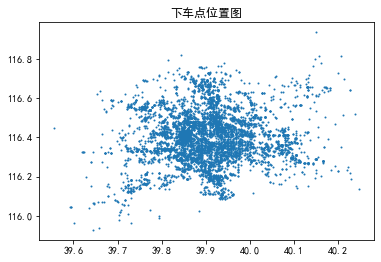

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
data=pd.read_csv(r'E:\OneDrive\桌面\4.17 2022数模大作业\B题  共享汽车运营策略探讨\附件3：B题数据.csv',encoding = 'gb2312')
print(data)
plt.scatter(data['endweidu'],data['endjingdu'],s=1)
plt.title('下车点位置图')
plt.savefig('dingjia')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import time
from sklearn.cluster import DBSCAN,KMeans,k_means
from sklearn.preprocessing import scale
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 导入轮廓系数所需要的库
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [3]:
print(data[['endweidu','endjingdu']])

       endweidu   endjingdu
0     39.973068  116.348648
1     39.753342  116.330795
2     39.957962  116.433792
3     39.848099  116.485977
4     39.985428  116.433792
...         ...         ...
7543  39.946976  116.363754
7544  39.784927  116.344528
7545  39.779434  116.509323
7546  39.920883  116.234665
7547  39.916763  116.502457

[7548 rows x 2 columns]


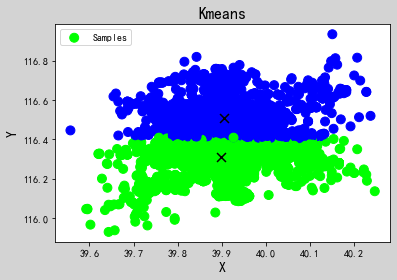

1    4226
0    3322
dtype: int64
[[ 39.90456845 116.51164915]
 [ 39.89858855 116.30893441]]
0.34989414505898736
[0.32774407 0.30672025 0.21337217 ... 0.37545686 0.53971563 0.51352819]
(7548,)


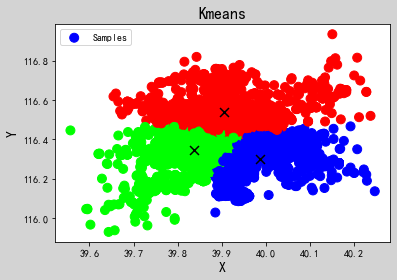

2    2869
1    2554
0    2125
dtype: int64
[[ 39.9854881  116.29949462]
 [ 39.90419493 116.53787673]
 [ 39.83632406 116.34727525]]
0.3406873484372518
[0.31403115 0.52327645 0.10885661 ... 0.15464015 0.2231859  0.44956208]
(7548,)


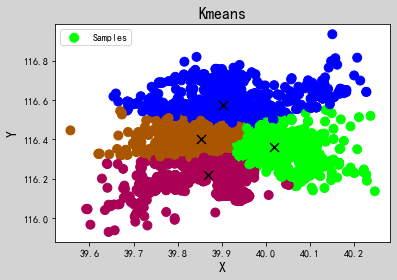

2    2880
0    1693
3    1553
1    1422
dtype: int64
[[ 39.90363831 116.57596994]
 [ 39.86957054 116.22020724]
 [ 39.85247621 116.40236287]
 [ 40.01792112 116.36125424]]
0.3843673726995907
[0.39021353 0.25635854 0.049622   ... 0.12629923 0.49020767 0.11950218]
(7548,)


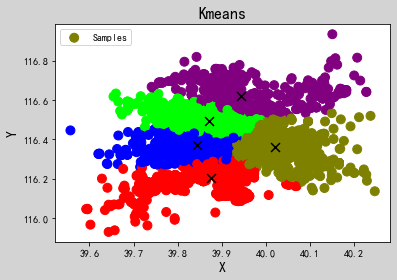

0    2319
4    1682
3    1518
2    1157
1     872
dtype: int64
[[ 39.84423019 116.36937723]
 [ 39.942611   116.62244306]
 [ 39.87500768 116.20267755]
 [ 40.01927581 116.35975661]
 [ 39.86978694 116.4919935 ]]
0.361409954249901
[ 0.37355705  0.4274761  -0.01575308 ...  0.31332952  0.47413338
  0.47261905]
(7548,)


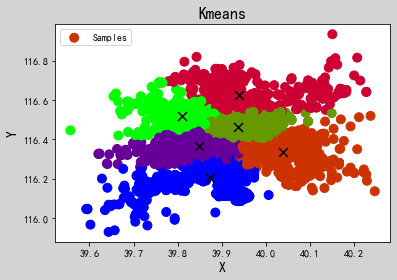

1    2390
4    1355
0    1153
3    1075
2     833
5     742
dtype: int64
[[ 39.87419485 116.20290087]
 [ 39.84740722 116.36830987]
 [ 39.93926187 116.62658866]
 [ 40.03908202 116.33756848]
 [ 39.936992   116.46119616]
 [ 39.80858509 116.5178765 ]]
0.37593408019533137
[0.28205359 0.41471349 0.54989334 ... 0.57127675 0.46692138 0.44935336]
(7548,)


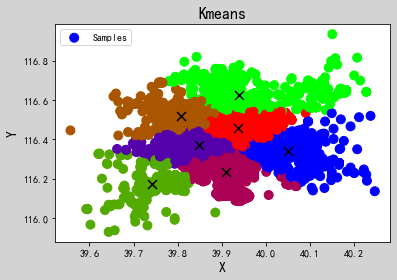

1    2240
3    1357
2    1154
0     953
6     834
4     731
5     279
dtype: int64
[[ 40.05041918 116.34293738]
 [ 39.84763568 116.37397391]
 [ 39.91046211 116.23221346]
 [ 39.93703344 116.45974268]
 [ 39.80831089 116.51877084]
 [ 39.74155795 116.17498828]
 [ 39.93923654 116.62648922]]
0.38659382837514694
[0.23645025 0.32337213 0.54003311 ... 0.55621297 0.62762185 0.44713418]
(7548,)


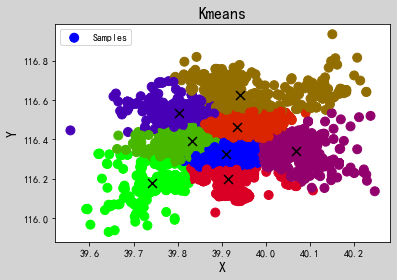

6    1758
4    1348
0    1238
5     817
2     770
3     736
1     599
7     282
dtype: int64
[[ 39.90896137 116.3232372 ]
 [ 39.80403423 116.53419597]
 [ 40.06846298 116.34290197]
 [ 39.91296667 116.19847356]
 [ 39.93492376 116.46477979]
 [ 39.94038996 116.6272547 ]
 [ 39.83213044 116.39163043]
 [ 39.74191219 116.17685521]]
0.3933347050682176
[0.2999464  0.33812807 0.50616956 ... 0.49281918 0.42641657 0.49349102]
(7548,)


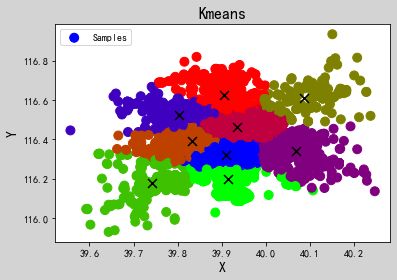

5    1739
3    1339
0    1233
2     763
8     735
4     694
1     601
7     282
6     162
dtype: int64
[[ 39.90902851 116.32305157]
 [ 39.80363703 116.52640129]
 [ 40.0674784  116.34100689]
 [ 39.9345966  116.46471424]
 [ 39.90587394 116.62893004]
 [ 39.83262397 116.39063446]
 [ 40.08529663 116.61029392]
 [ 39.74191219 116.17685521]
 [ 39.91296524 116.19838871]]
0.4053578938286004
[0.2922748  0.34139418 0.51018905 ... 0.51983675 0.42657122 0.48966263]
(7548,)


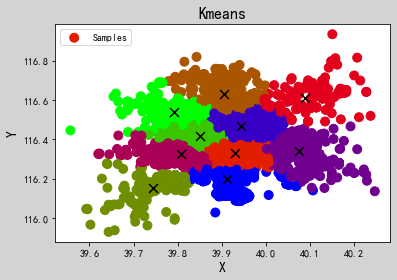

8    1623
1    1179
5    1062
0     741
3     719
2     683
6     670
9     482
7     231
4     158
dtype: int64
[[ 39.91266567 116.19892414]
 [ 39.94275558 116.47100037]
 [ 40.07566753 116.34189003]
 [ 39.80742939 116.32440066]
 [ 40.08726868 116.61198097]
 [ 39.92984184 116.32926066]
 [ 39.90592433 116.63028325]
 [ 39.74419829 116.15201182]
 [ 39.84958543 116.41525987]
 [ 39.79243488 116.54003127]]
0.4174837157985104
[0.47625613 0.45593125 0.46054594 ... 0.47103094 0.4440584  0.46949873]
(7548,)


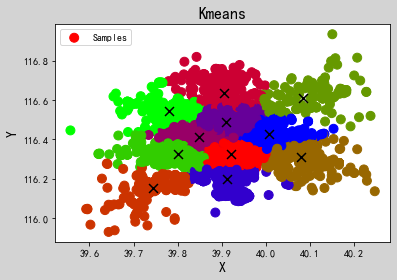

3     1521
5     1050
2     1033
1      723
0      662
9      655
4      600
7      513
10     401
6      229
8      161
dtype: int64
[[ 40.00682327 116.42765502]
 [ 39.91098143 116.19815589]
 [ 39.90997101 116.49012883]
 [ 39.8490209  116.41066722]
 [ 39.90443573 116.63881302]
 [ 39.92168591 116.32497815]
 [ 39.74467615 116.1510081 ]
 [ 40.07984161 116.31230146]
 [ 40.0841598  116.6129085 ]
 [ 39.80130413 116.32582838]
 [ 39.77919908 116.54387689]]
0.40926859714222596
[0.3015757  0.47603646 0.19732236 ... 0.51127019 0.42569575 0.61267214]
(7548,)


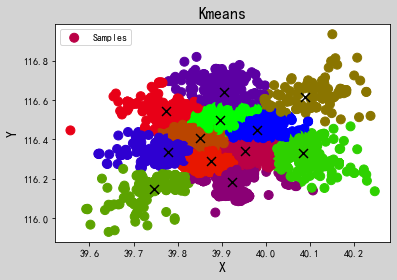

7     1491
11     933
6      787
4      734
0      680
2      595
10     570
3      565
1      446
5      368
9      227
8      152
dtype: int64
[[ 39.97985738 116.4482839 ]
 [ 39.7777376  116.33801584]
 [ 39.90469219 116.63960805]
 [ 39.92248981 116.18371461]
 [ 39.95323597 116.33940361]
 [ 39.77418361 116.54704384]
 [ 39.87481598 116.29177428]
 [ 39.85006612 116.40714602]
 [ 40.08806798 116.61473659]
 [ 39.74605779 116.14968421]
 [ 40.08414903 116.33283006]
 [ 39.89611095 116.4967854 ]]
0.4169307828815404
[0.59109386 0.58405105 0.47802327 ... 0.51023875 0.23729111 0.51121338]
(7548,)


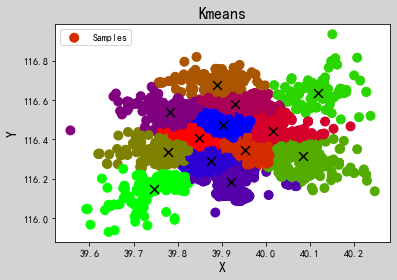

6     1411
0     1001
1      801
7      756
2      557
5      528
10     494
4      492
9      446
3      412
8      317
12     227
11     106
dtype: int64
[[ 39.90205341 116.47295981]
 [ 39.87620659 116.29157581]
 [ 39.92081919 116.18341015]
 [ 39.78229412 116.5412088 ]
 [ 39.92912292 116.57845381]
 [ 40.01683769 116.44546379]
 [ 39.84778731 116.40562845]
 [ 39.95246161 116.3454637 ]
 [ 39.88942312 116.67874478]
 [ 39.77791619 116.33760324]
 [ 40.0828648  116.31411008]
 [ 40.11887028 116.63733717]
 [ 39.74605779 116.14968421]]
0.42178576472019974
[0.61796122 0.57491972 0.02348298 ... 0.53308458 0.24143676 0.42451384]
(7548,)


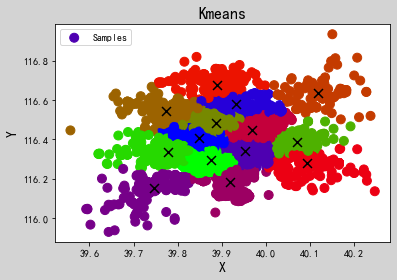

0     1417
10     809
13     782
2      728
5      652
4      559
1      482
12     446
11     372
9      361
7      320
6      287
3      227
8      106
dtype: int64
[[ 39.84916891 116.40504016]
 [ 39.93120998 116.57908688]
 [ 39.95312525 116.3398503 ]
 [ 39.74639692 116.14994852]
 [ 39.91927042 116.18444205]
 [ 39.96932078 116.45059113]
 [ 40.09351112 116.28066299]
 [ 39.88917732 116.67809629]
 [ 40.11887028 116.63733717]
 [ 39.77430243 116.54502108]
 [ 39.88567484 116.48477808]
 [ 40.06910632 116.38505135]
 [ 39.7777376  116.33801584]
 [ 39.87479342 116.29269879]]
0.42258582940230127
[0.59465415 0.57698082 0.52705236 ... 0.48313793 0.26417278 0.43726923]
(7548,)


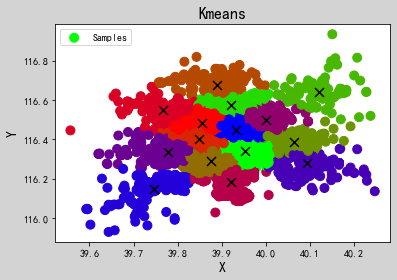

8     1302
10     782
14     724
0      706
7      613
5      553
13     498
3      445
11     409
9      315
6      305
2      290
4      277
1      227
12     102
dtype: int64
[[ 39.93304273 116.45043477]
 [ 39.74605779 116.14968421]
 [ 40.093378   116.28121001]
 [ 39.77786429 116.33781843]
 [ 39.9999606  116.49827643]
 [ 39.91959929 116.18355515]
 [ 39.76656129 116.55165651]
 [ 39.85612982 116.48153193]
 [ 39.84897526 116.40119807]
 [ 39.88947623 116.67913164]
 [ 39.87510564 116.29144637]
 [ 40.06225455 116.38738364]
 [ 40.12061624 116.64075515]
 [ 39.92156162 116.57572804]
 [ 39.95328148 116.33967527]]
0.42099618708057945
[0.57937595 0.56732279 0.4612922  ... 0.31145222 0.25579127 0.14776208]
(7548,)


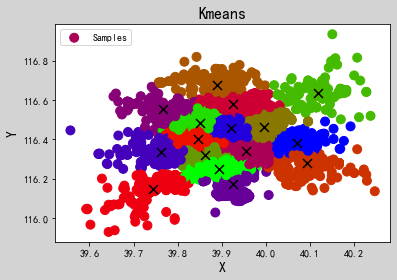

8     1279
5      703
1      700
12     601
14     553
6      497
15     493
3      418
11     380
0      367
2      328
10     313
4      303
9      285
7      222
13     106
dtype: int64
[[ 40.06979358 116.38392331]
 [ 39.92103861 116.46031158]
 [ 39.76273699 116.33497378]
 [ 39.92477636 116.17057362]
 [ 39.76760487 116.55273815]
 [ 39.95542057 116.34255128]
 [ 39.92603371 116.57871162]
 [ 39.74505863 116.14823418]
 [ 39.84639098 116.40177223]
 [ 40.09299268 116.28016181]
 [ 39.88934575 116.67944887]
 [ 39.99534085 116.46545009]
 [ 39.86285365 116.3213944 ]
 [ 40.11887028 116.63733717]
 [ 39.85121039 116.4823192 ]
 [ 39.89284795 116.25139004]]
0.407574345582789
[0.61257852 0.58117691 0.09931694 ... 0.27986755 0.32806985 0.33701738]
(7548,)


In [4]:
m=0
for i in list(range(2,17)):# KMeans聚类
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(data[['endweidu','endjingdu']])

    # 画图显示样本数据
    plt.figure('Kmeans', facecolor='lightgray')
    plt.title('Kmeans', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.tick_params(labelsize=10)
    plt.scatter(data['endweidu'], data['endjingdu'], s=80, c=y_pred, cmap='brg', label='Samples')
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="x",s=80,c="black")
    plt.legend()
    plt.show()
    print(pd.value_counts(model.labels_))
    print(model.cluster_centers_)
    # 查看轮廓系数均值
    print(silhouette_score(data[['endweidu','endjingdu']],model.labels_))
    # 输出结果
    # 查看每一样本轮廓系数
    print(silhouette_samples(data[['endweidu','endjingdu']],model.labels_))
    # 输出结果
    # 查看样本轮廓系数结果的数组结构
    print(silhouette_samples(data[['endweidu','endjingdu']],model.labels_).shape)
    # 输出结果

In [5]:
print(pd.value_counts(model.labels_))
print(model.cluster_centers_)

8     1279
5      703
1      700
12     601
14     553
6      497
15     493
3      418
11     380
0      367
2      328
10     313
4      303
9      285
7      222
13     106
dtype: int64
[[ 40.06979358 116.38392331]
 [ 39.92103861 116.46031158]
 [ 39.76273699 116.33497378]
 [ 39.92477636 116.17057362]
 [ 39.76760487 116.55273815]
 [ 39.95542057 116.34255128]
 [ 39.92603371 116.57871162]
 [ 39.74505863 116.14823418]
 [ 39.84639098 116.40177223]
 [ 40.09299268 116.28016181]
 [ 39.88934575 116.67944887]
 [ 39.99534085 116.46545009]
 [ 39.86285365 116.3213944 ]
 [ 40.11887028 116.63733717]
 [ 39.85121039 116.4823192 ]
 [ 39.89284795 116.25139004]]


In [6]:
# 导入轮廓系数所需要的库
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
 
# 查看轮廓系数均值
print(silhouette_score(data[['endweidu','endjingdu']],model.labels_))
# 输出结果
# 查看每一样本轮廓系数
print(silhouette_samples(data[['endweidu','endjingdu']],model.labels_))
# 输出结果
# 查看样本轮廓系数结果的数组结构
print(silhouette_samples(data[['endweidu','endjingdu']],model.labels_).shape)
# 输出结果

0.407574345582789
[0.61257852 0.58117691 0.09931694 ... 0.27986755 0.32806985 0.33701738]
(7548,)


In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
print(data)

       id   carid  startday starttime  startweidu  startjingdu    endday  \
0       4  459074  1/5/2018   6:09:49   39.970322   116.351395  1/5/2018   
1       3  420604  1/5/2018   6:07:14   39.756088   116.312943  1/5/2018   
2       5  165558  1/5/2018   6:17:56   39.953842   116.436539  1/5/2018   
3      29  258590  1/5/2018   8:09:42   39.850845   116.488724  1/5/2018   
4      28  373864  1/5/2018   8:08:09   39.986801   116.442032  1/5/2018   
...   ...     ...       ...       ...         ...          ...       ...   
7543  759  299501  3/5/2018  13:57:37   39.955215   116.358261  3/5/2018   
7544  757  375130  3/5/2018  13:48:34   39.787674   116.326675  3/5/2018   
7545  756   29137  3/5/2018  13:47:58   39.776688   116.514816  3/5/2018   
7546  755  119594  3/5/2018  13:46:46   39.930496   116.236038  3/5/2018   
7547  758  373632  3/5/2018  13:49:44   39.925003   116.509323  3/5/2018   

       endtime   endweidu   endjingdu  行驶距离（km）  收取费用(元)      公里数单价  
0      7:00:24  3

簇数为 2 ，轮廓系数均值为 0.34986546885224784


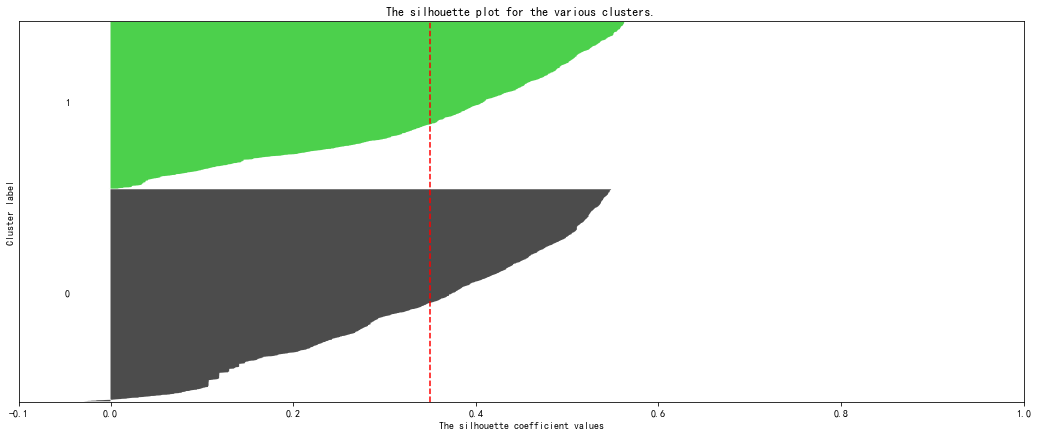

簇数为 3 ，轮廓系数均值为 0.3464109650786868


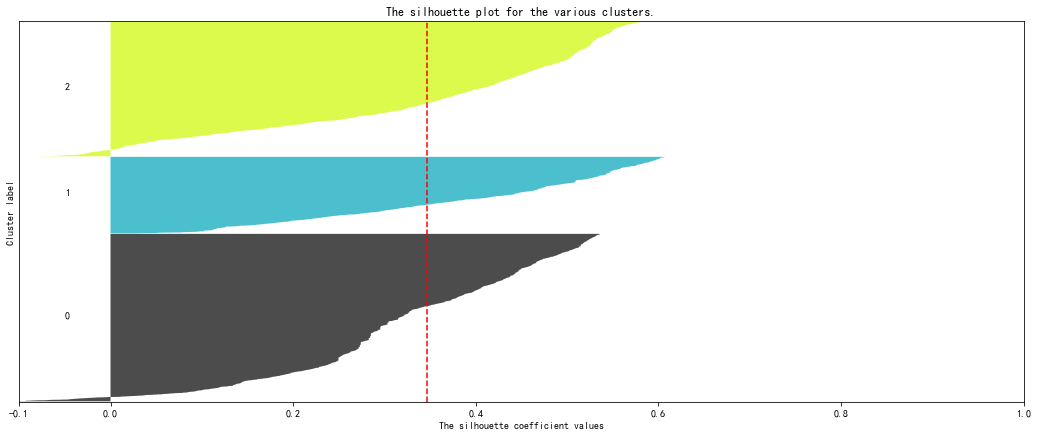

簇数为 4 ，轮廓系数均值为 0.3843358610984641


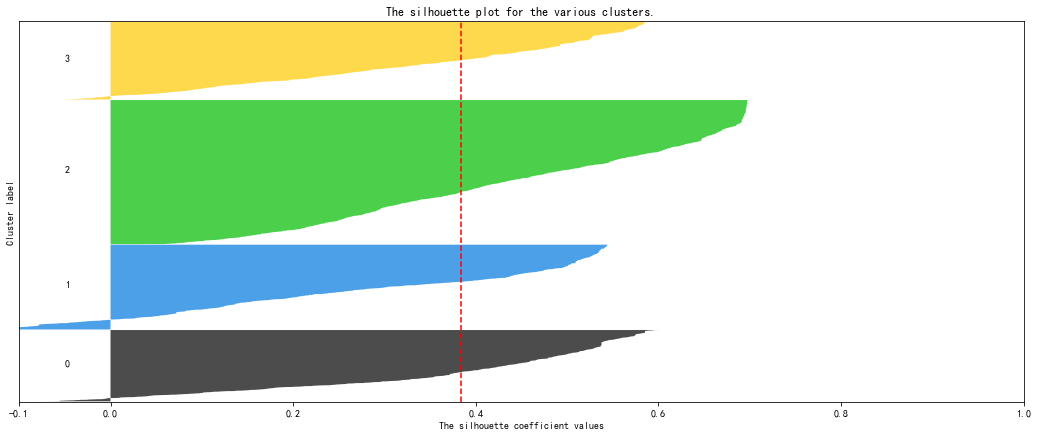

簇数为 5 ，轮廓系数均值为 0.3614871935023504


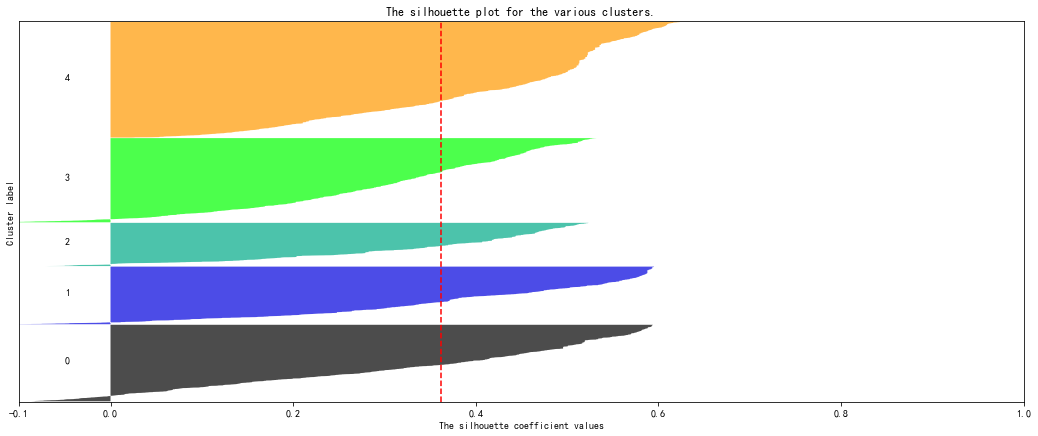

簇数为 6 ，轮廓系数均值为 0.3765788554003183


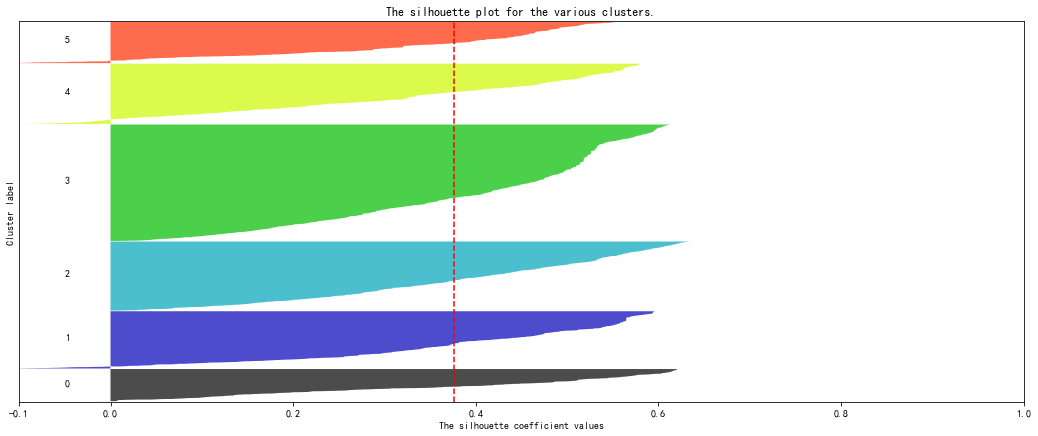

簇数为 7 ，轮廓系数均值为 0.3868007000730067


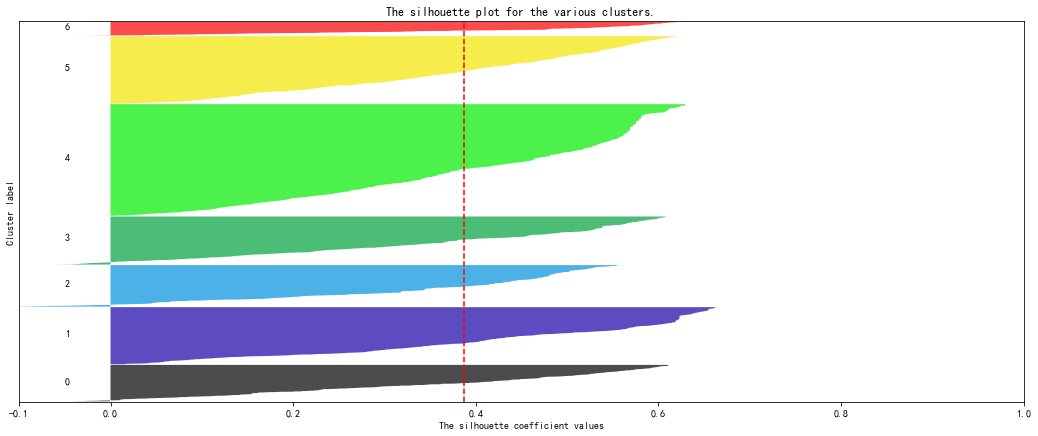

簇数为 8 ，轮廓系数均值为 0.39367710678647283


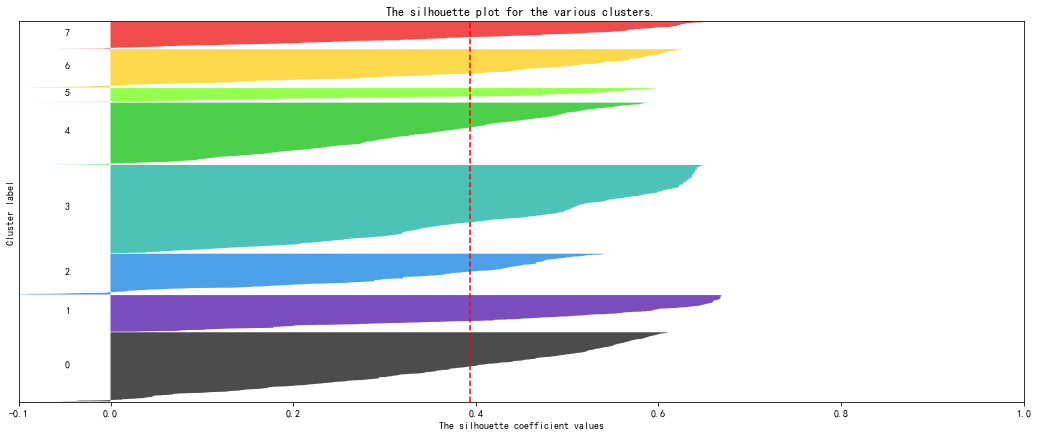

簇数为 10 ，轮廓系数均值为 0.4181384577962329


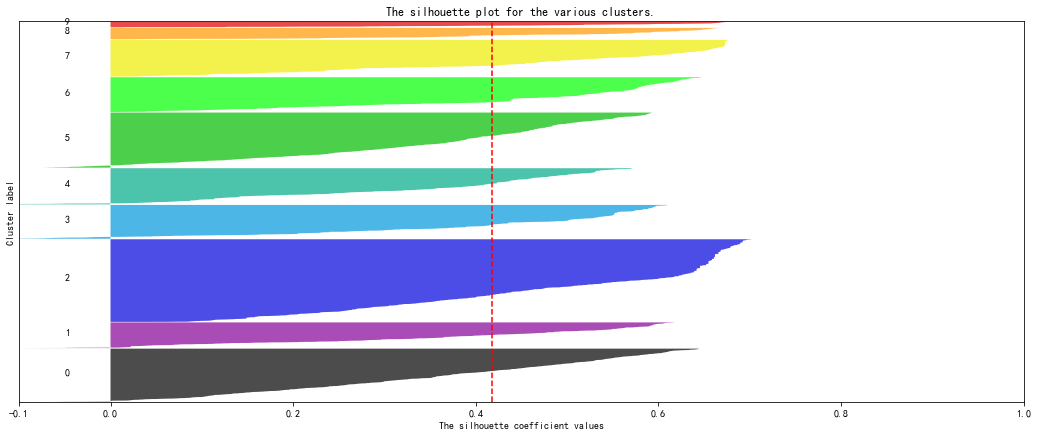

簇数为 12 ，轮廓系数均值为 0.41960703045576386


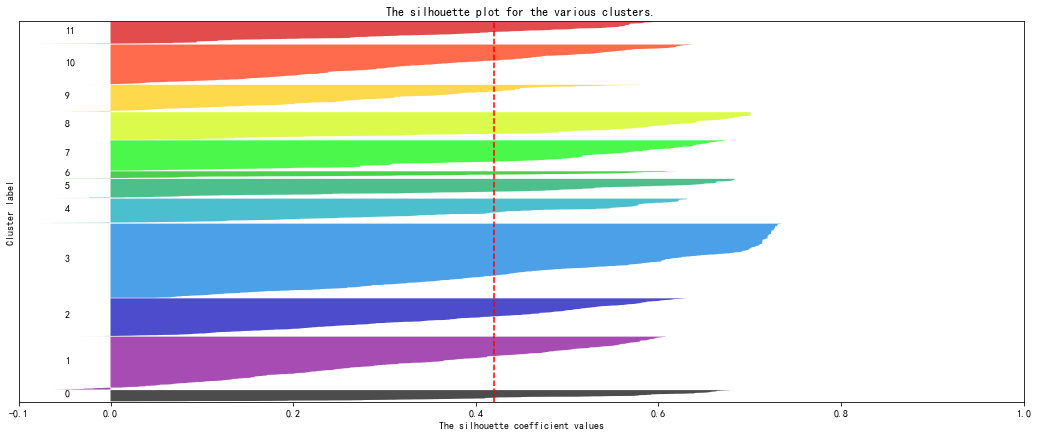

簇数为 13 ，轮廓系数均值为 0.421676568221689


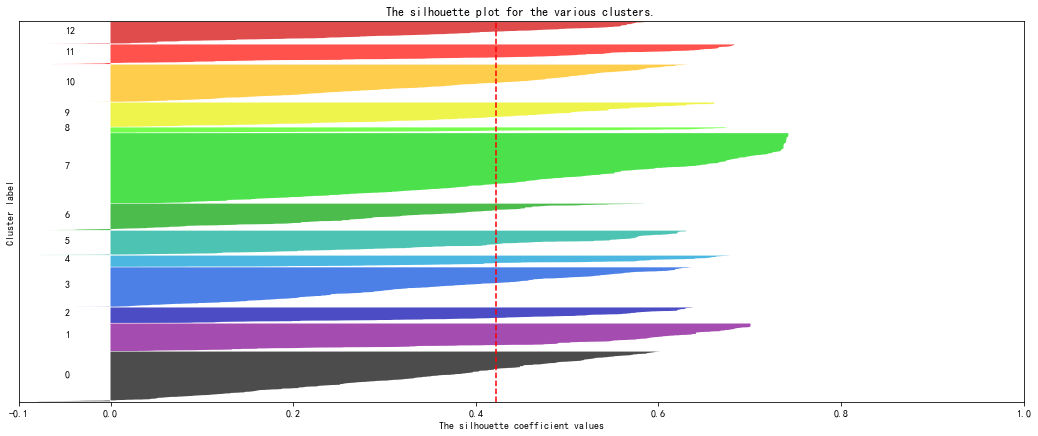

簇数为 16 ，轮廓系数均值为 0.4102691340895528


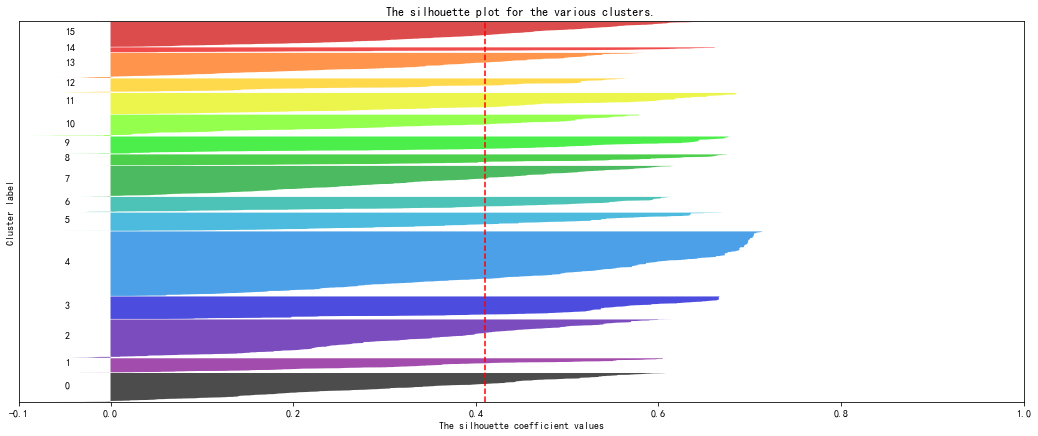

In [8]:
data = np.array(data[['endweidu','endjingdu']],type(float))
X=data
cluster_labels=model
for n_clusters in [2,3,4,5,6,7,8,10,12,13,16]:
    n_clusters = n_clusters
    # 设置画布
    fig, ax1 = plt.subplots(1)
    # 设置画布尺寸
    fig.set_size_inches(18, 7)
    # 设置画布X轴
    ax1.set_xlim([-0.1, 1])
    # 设置画布Y轴：X.shape[0]代表着柱状的宽度，(n_clusters + 1) * 10代表着柱与柱之间的间隔
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    # 模型实例化
    clusterer = KMeans(n_clusters=n_clusters, random_state=100)
    # 开始训练模型
    clusterer = clusterer.fit(X)
    # 提取训练结果中的预测标签
    cluster_labels = clusterer.labels_
    # 提取训练结果中的轮廓系数均值
    silhouette_avg = silhouette_score(X, cluster_labels)
    # 打印出当前的簇数与轮廓系数均值
    print("簇数为", n_clusters,
          "，轮廓系数均值为", silhouette_avg)
    # 提取每一个样本的轮廓系数
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # 设置Y轴的起始坐标
    y_lower = 10
    # 添加一个循环，把每一个样本的轮廓系数画在图中
    for i in range(n_clusters):
        # 提取第i个簇下的所有样本轮廓系数
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        # 对样本的轮廓系数进行排序（降序）
        ith_cluster_silhouette_values.sort()
        # 设置当前簇的柱状宽度（使用样本数量）以便于设置下一个簇的起始坐标
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        # 设置Y轴第i个簇的起始坐标
        y_upper = y_lower + size_cluster_i
        # 设置颜色
        color = cm.nipy_spectral(float(i)/n_clusters)
        # 画图
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                         ,ith_cluster_silhouette_values
                         ,facecolor=color
                         ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    # 设置图的标题
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # 添加轮廓系数均值线，使用虚线
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

<AxesSubplot:xlabel='endweidu', ylabel='endjingdu'>

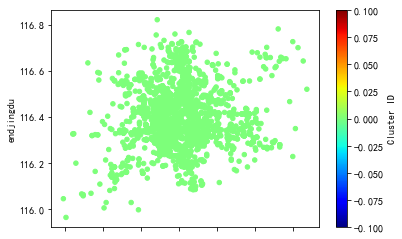

In [9]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r'E:\OneDrive\桌面\4.17 2022数模大作业\B题  共享汽车运营策略探讨\工作簿1.csv',encoding = 'gb2312')
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=8).fit(data[['endweidu','endjingdu']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data[['endweidu','endjingdu']],labels), axis=1)
result.plot.scatter(x='endweidu',y='endjingdu',c='Cluster ID', colormap='jet')

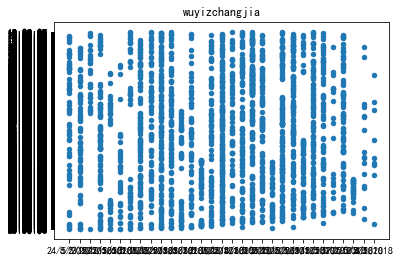

In [10]:
plt.scatter(data['endday'],data['endtime'],s=20)
plt.title('wuyizchangjia')
plt.savefig('dingjia')
plt.show()